In [30]:
import pandas as pd

In [31]:
demo = pd.read_csv('df_final_demo.txt')
demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [32]:
demo_duplicates = demo.duplicated()
demo_duplicates.sum()

0

In [33]:
print(demo.isnull().sum())

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64


In [34]:
print(demo.columns)

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


In [35]:
demo = demo.rename(columns={'clnt_tenure_yr': 'tenure_year', 'clnt_tenure_mnth': 'tenure_month', 'clnt_age':'client_age', 'gendr':'gender','bal':'total_balance'})
demo

,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [36]:
demo['gender'].unique()

# make a dict

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [37]:
demo['gender'] = demo['gender'].replace(['U', 'X', 'nan','unknown'], 'undisclosed')
demo['gender'] = demo['gender'].fillna('undisclosed')

# Display the cleaned DataFrame
print("\nDataFrame after cleaning 'gender' column:")
print(demo)



DataFrame after cleaning 'gender' column:
       client_id  tenure_year  tenure_month  client_age       gender  \
0         836976          6.0          73.0        60.5  undisclosed   
1        2304905          7.0          94.0        58.0  undisclosed   
2        1439522          5.0          64.0        32.0  undisclosed   
3        1562045         16.0         198.0        49.0            M   
4        5126305         12.0         145.0        33.0            F   
...          ...          ...           ...         ...          ...   
70604    7993686          4.0          56.0        38.5  undisclosed   
70605    8981690         12.0         148.0        31.0            M   
70606     333913         16.0         198.0        61.5            F   
70607    1573142         21.0         255.0        68.0            M   
70608    5602139         21.0         254.0        59.5            F   

       num_accts  total_balance  calls_6_mnth  logons_6_mnth  
0            2.0       45105.

In [38]:
gender_counts = demo['gender'].value_counts()

# Get counts for 'F' and 'M'
count_f = gender_counts.get('F', 0)
count_m = gender_counts.get('M', 0)

# Display the counts
print(f"\nCount of 'F' in 'gender' column: {count_f}")
print(f"Count of 'M' in 'gender' column: {count_m}")


Count of 'F' in 'gender' column: 22746
Count of 'M' in 'gender' column: 23724


In [39]:
gender_counts = demo['gender'].value_counts()
count_unknown = gender_counts.get('undisclosed', 0)

# Alternatively, count using boolean indexing
count_unknown_alternative = (demo['gender'] == 'undisclosed').sum()

# Display the counts
print(f"\nCount of 'undisclosed' in 'gender' column: {count_unknown}")


Count of 'undisclosed' in 'gender' column: 24139


In [40]:
demo['client_age'] = demo['client_age'].round(0).fillna(-1).astype(int)

# Display the DataFrame after rounding
print("\nDataFrame after rounding 'client_age':")
print(demo[['client_age']].head())


DataFrame after rounding 'client_age':
   client_age
0          60
1          58
2          32
3          49
4          33


In [41]:
# Fill NaN values before converting to int
cols_to_clean = ['tenure_year', 'tenure_month', 'calls_6_mnth', 'logons_6_mnth', 'num_accts', 'total_balance']
demo[cols_to_clean] = demo[cols_to_clean].round(0).fillna(-1).astype(int)

print("\nDataFrame after cleaning 'tenure_year', 'tenure_month', 'calls_6_mnth', 'logons_6_mnth', 'num_accts', 'total_balance' :")
print(demo)


DataFrame after cleaning 'tenure_year', 'tenure_month', 'calls_6_mnth', 'logons_6_mnth', 'num_accts', 'total_balance' :
       client_id  tenure_year  tenure_month  client_age       gender  \
0         836976            6            73          60  undisclosed   
1        2304905            7            94          58  undisclosed   
2        1439522            5            64          32  undisclosed   
3        1562045           16           198          49            M   
4        5126305           12           145          33            F   
...          ...          ...           ...         ...          ...   
70604    7993686            4            56          38  undisclosed   
70605    8981690           12           148          31            M   
70606     333913           16           198          62            F   
70607    1573142           21           255          68            M   
70608    5602139           21           254          60            F   

       num_acc

In [42]:
demo.nunique()

client_id        70609
tenure_year         55
tenure_month       483
client_age          83
gender               3
num_accts            9
total_balance    56924
calls_6_mnth         9
logons_6_mnth       10
dtype: int64

In [43]:
demo.head()

,client_id,tenure_year,tenure_month,client_age,gender,num_accts,total_balance,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,undisclosed,2,45105,6,9
1,2304905,7,94,58,undisclosed,2,110860,6,9
2,1439522,5,64,32,undisclosed,2,52468,6,9
3,1562045,16,198,49,M,2,67455,3,6
4,5126305,12,145,33,F,2,103672,0,3


In [44]:
bins = [0, 30, 50, 100]  # Note that zero is included to cover ages under 18, if any
labels = ['young', 'mature', 'senior']

# Categorize ages into bins using cut
demo['age_category'] = pd.cut(demo['client_age'], bins=bins, labels=labels, right=False)

# Count the number of clients in each age category
age_category_counts = demo['age_category'].value_counts()

# Display the categorized ages and their counts
print("DataFrame with Age Categories:")
print(demo)

print("\nCounts of each Age Category:")
print(age_category_counts)

DataFrame with Age Categories:
       client_id  tenure_year  tenure_month  client_age       gender  \
0         836976            6            73          60  undisclosed   
1        2304905            7            94          58  undisclosed   
2        1439522            5            64          32  undisclosed   
3        1562045           16           198          49            M   
4        5126305           12           145          33            F   
...          ...          ...           ...         ...          ...   
70604    7993686            4            56          38  undisclosed   
70605    8981690           12           148          31            M   
70606     333913           16           198          62            F   
70607    1573142           21           255          68            M   
70608    5602139           21           254          60            F   

       num_accts  total_balance  calls_6_mnth  logons_6_mnth age_category  
0              2          45

In [45]:
median_age = demo['client_age'].median()

# Display the median age
print("Median Age:", median_age)

Median Age: 47.0


In [46]:
mean_age = demo['client_age'].mean()

# Display the mean age
print("Mean Age:", mean_age)

Mean Age: 46.43572349133963


In [47]:
older_clients = demo[demo['client_age'] > 45]

# Count the number of occurrences of each gender in the filtered DataFrame
gender_counts = older_clients['gender'].value_counts()

# Display the most common gender among clients older than 45
if not gender_counts.empty:
    most_common_gender = gender_counts.idxmax()
    print("Gender most common among clients older than 45:", most_common_gender)
else:
    print("No clients older than 45.")

Gender most common among clients older than 45: F


In [48]:
female_clients_over_45 = demo[(demo['gender'] == 'F') & (demo['client_age'] > 45)]

# Sum tenure years for these filtered clients
total_tenure_years = female_clients_over_45['tenure_year'].mean()

# Display the results
print("Female clients over age 45:")
print(female_clients_over_45)

print("\nTotal tenure years of female clients over age 45:")
print(total_tenure_years)

Female clients over age 45:
       client_id  tenure_year  tenure_month  client_age gender  num_accts  \
9        8198645           15           189          54      F          2   
38        313570           18           223          48      F          2   
40       3753796           25           305          66      F          2   
41       6647577           23           286          68      F          3   
42       6341488           23           285          65      F          2   
...          ...          ...           ...         ...    ...        ...   
70595    1196936           15           184          46      F          2   
70597    4194308           10           130          56      F          2   
70601    2690705           15           181          53      F          2   
70606     333913           16           198          62      F          2   
70608    5602139           21           254          60      F          3   

       total_balance  calls_6_mnth  logons_6_mn

In [49]:
women_over_45 = demo[(demo['gender'] == 'F') & (demo['client_age'] > 45)]

# Calculate the mean of 'calls_6_mnth' for this subset
mean_calls = women_over_45['calls_6_mnth'].mean()

# Display the mean
print("Mean of 'calls_6_mnth' for women over 45:", mean_calls)

Mean of 'calls_6_mnth' for women over 45: 3.1884607135196967


In [50]:
women_over_45 = demo[(demo['gender'] == 'F') & (demo['client_age'] > 45)]

# Calculate the mean of 'logons_6_mnth' for this subgroup
if not women_over_45.empty:
    mean_logons = women_over_45['logons_6_mnth'].mean()
    print("\nMean logons in 6 months for women over age 45:", mean_logons)
else:
    print("\nNo women over age 45 in the dataset.")


Mean logons in 6 months for women over age 45: 5.458997640666333


In [51]:
exp_clients = pd.read_csv('df_final_experiment_clients.txt')
exp_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [52]:
bins = [0, 30, 50, 100]
labels = ['young', 'mature', 'senior']
demo['age_category'] = pd.cut(demo['client_age'], bins=bins, labels=labels, right=False)

# Group by 'gender' and 'age_category' and sum the 'logons_6_mnth'
grouped_logons = demo.groupby(['gender', 'age_category'])['logons_6_mnth'].sum().reset_index()

# Find the group with the most logons
most_online_group = grouped_logons.loc[grouped_logons['logons_6_mnth'].idxmax()]

# Display results
print("Grouped Logons:")
print(grouped_logons)

print("\nGroup with Most Online Logons:")
print(most_online_group)

Grouped Logons:
        gender age_category  logons_6_mnth
0            F        young          11773
1            F       mature          41206
2            F       senior          67275
3            M        young          16164
4            M       mature          50418
5            M       senior          73049
6  undisclosed        young          40469
7  undisclosed       mature          45848
8  undisclosed       senior          46775

Group with Most Online Logons:
gender                M
age_category     senior
logons_6_mnth     73049
Name: 5, dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_9736\946842725.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_logons = demo.groupby(['gender', 'age_category'])['logons_6_mnth'].sum().reset_index()


In [53]:
# Replace -1 with 1 in the 'logons_6_mnth' column
demo['logons_6_mnth'] = demo['logons_6_mnth'].replace(-1, 1)


print("\nDataFrame after replacing -1 with 1 in 'logons_6_mnth':")
print(demo)


DataFrame after replacing -1 with 1 in 'logons_6_mnth':
       client_id  tenure_year  tenure_month  client_age       gender  \
0         836976            6            73          60  undisclosed   
1        2304905            7            94          58  undisclosed   
2        1439522            5            64          32  undisclosed   
3        1562045           16           198          49            M   
4        5126305           12           145          33            F   
...          ...          ...           ...         ...          ...   
70604    7993686            4            56          38  undisclosed   
70605    8981690           12           148          31            M   
70606     333913           16           198          62            F   
70607    1573142           21           255          68            M   
70608    5602139           21           254          60            F   

       num_accts  total_balance  calls_6_mnth  logons_6_mnth age_category  
0 

C:\Users\User\AppData\Local\Temp\ipykernel_9736\1377369437.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_grouped = demo.groupby(['gender', 'age_category'])['logons_6_mnth'].sum().reset_index()


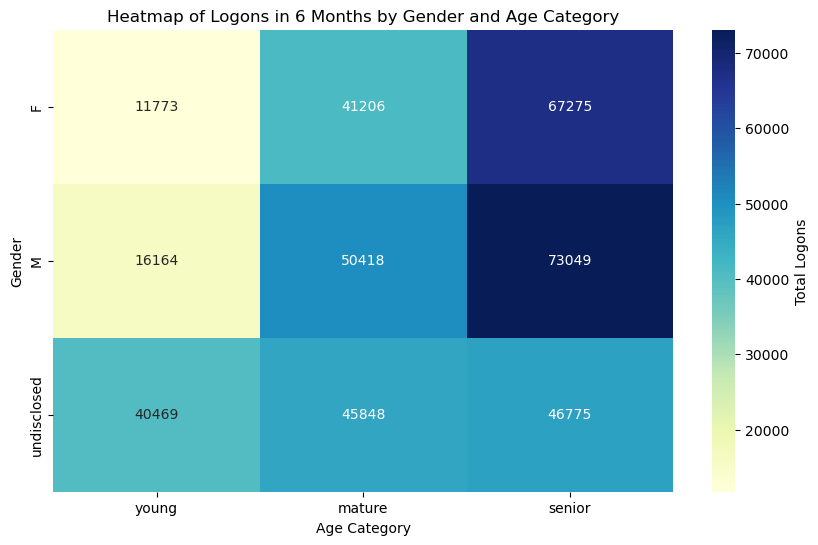

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the demo DataFrame by 'gender' and 'age_category' and sum 'logons_6_mnth'
demo_grouped = demo.groupby(['gender', 'age_category'])['logons_6_mnth'].sum().reset_index()

# Pivot the DataFrame to get the proper format for a heatmap
pivot_table = demo_grouped.pivot(index='gender', columns='age_category', values='logons_6_mnth')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Total Logons'})
plt.title('Heatmap of Logons in 6 Months by Gender and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Gender')
plt.show()


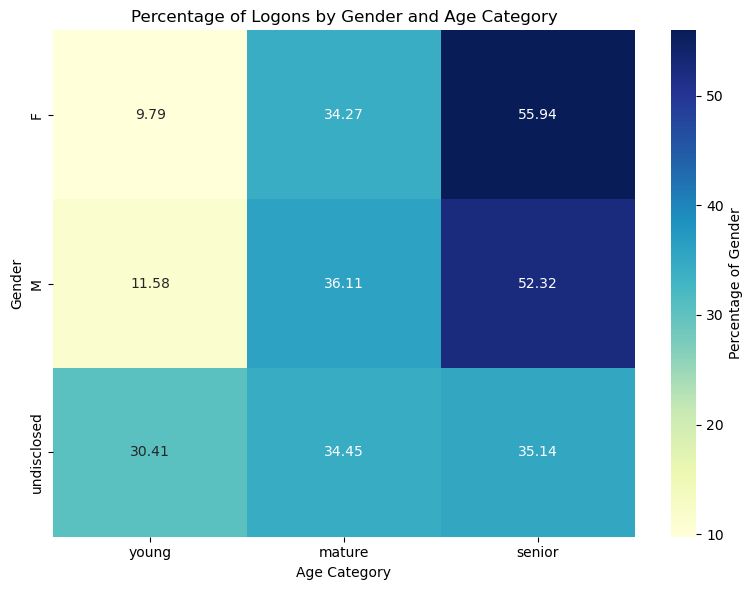

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total logons for each gender (already done above, reused here)
# gender_totals = grouped_logons.groupby('gender')['logons_6_mnth'].sum()

# Calculate percentage of logons for each age category within each gender
grouped_logons['percentage_of_gender'] = grouped_logons.apply(
	lambda row: row['logons_6_mnth'] / gender_totals[row['gender']] * 100, axis=1
)

# Create a pivot table for the heatmap
pivot_table = grouped_logons.pivot(index='gender', columns='age_category', values='percentage_of_gender')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Percentage of Gender'})
plt.title('Percentage of Logons by Gender and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

In [56]:
exp_clients.columns = [col.lower() for col in exp_clients.columns]
print(exp_clients.columns)

Index(['client_id', 'variation'], dtype='object')


In [57]:
exp_clients['variation'] = exp_clients['variation'].fillna('unknown')

# Display the DataFrame after cleaning
print("\nDataFrame after replacing NaN values in 'variation':")
print(exp_clients)


DataFrame after replacing NaN values in 'variation':
       client_id variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347   unknown
70605    8788427   unknown
70606     266828   unknown
70607    1266421   unknown
70608    9895983   unknown

[70609 rows x 2 columns]


In [58]:
variation_counts = exp_clients['variation'].value_counts()

# Display the counts of unique values
print("\nCounts of unique values in 'variation' column:")
print(variation_counts)


Counts of unique values in 'variation' column:
variation
Test       26968
Control    23532
unknown    20109
Name: count, dtype: int64


In [59]:
exp_clients_duplicates = exp_clients.duplicated()
exp_clients_duplicates.sum()

0

In [60]:
print(exp_clients.isnull().sum())

client_id    0
variation    0
dtype: int64


In [61]:
exp_clients['variation'].unique()

array(['Test', 'Control', 'unknown'], dtype=object)

In [62]:
exp_clients.nunique()

client_id    70609
variation        3
dtype: int64